<h1>Naive Bayes </h1>

In [ ]:
#Importing the Requisite Libraries
import pandas as pd
import numpy as np
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
import matplotlib as plt
%matplotlib inline
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

In [ ]:
#Mounting the Drive on Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1.1 Loading Data

In [ ]:
#Loading the dataset from GDrive. Loading 50K rows
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/preprocessed_data.csv', nrows= 50000) #Loading 50K datapoints into a drataframe

In [ ]:
#Looking at the Number of Rows and Columns in the DataFrame
print("Number of Rows:", data.shape[0])
print("Number of Cols:",data.shape[1])

Number of Rows: 50000
Number of Cols: 9


In [ ]:
#Looking at the Names of the Columns
data.columns

Index(['school_state', 'teacher_prefix', 'project_grade_category',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'price'],
      dtype='object')

In [ ]:
#Looking to see the datatypes and checking if there are any Null Values in the columns
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   school_state                                  50000 non-null  object 
 1   teacher_prefix                                50000 non-null  object 
 2   project_grade_category                        50000 non-null  object 
 3   teacher_number_of_previously_posted_projects  50000 non-null  int64  
 4   project_is_approved                           50000 non-null  int64  
 5   clean_categories                              50000 non-null  object 
 6   clean_subcategories                           50000 non-null  object 
 7   essay                                         50000 non-null  object 
 8   price                                         50000 non-null  float64
dtypes: float64(1), int64(2), object(6)
memory usage: 3.4+ MB


In [ ]:
#Looking at the sample dataframe
data.head(3) 

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03
2,ca,mrs,grades_prek_2,10,1,literacy_language,literacy,having class 24 students comes diverse learner...,329.00


In [ ]:
y= data["project_is_approved"].values                                           #Saving the Y-Values in a seperate Numpy Array 
x= data.drop('project_is_approved', axis=1)                                     #Saving all the independent variables into a dataframe

In [ ]:
x.head(2)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03


<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [ ]:
from sklearn.model_selection import train_test_split                                              #importing the train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.33, stratify= y)                 #Splitting the x attributes and the y values into the train and test datasets
x_train,x_cv, y_train, y_cv= train_test_split(x_train,y_train, test_size=0.33, stratify= y_train) #Further splitting the train dataset into training and the Cross validate datasets

#In the above two lines of code we have used the stratify option which basically splits the data in the same proportion of class division as the Dependent Variable

In [ ]:
#Looking at the Number of Rows and Columns in each of the Training, CrossValidate and the Test Datasets
print("Shape of the Training Data")
print('Rows in the Training Set',x_train.shape[0])
print('Columns in the Training Set',x_train.shape[1])
print('='*50)
print('Shape of the CV Data')
print('Rows in the CrossValidate Set',x_cv.shape[0])
print('Columns in the CrossValidate Set',x_cv.shape[1])
print('='*50)
print('Shape of the CV Data')
print('Rows in the Testing Set',x_test.shape[0])
print('Columns in the Testing Set',x_test.shape[1])

Shape of the Training Data
Rows in the Training Set 22445
Columns in the Training Set 8
Shape of the CV Data
Rows in the CrossValidate Set 11055
Columns in the CrossValidate Set 8
Shape of the CV Data
Rows in the Testing Set 16500
Columns in the Testing Set 8


<h2>1.3 Make Data Model Ready: encoding eassay, and project_title</h2>

###Using Bag of Words

In [ ]:
vect_b = CountVectorizer(min_df=10, ngram_range= (1,4), max_features= 50000)    #Loading the CountVectorizer model into an object/varible vect_b
vect_b.fit(x_train['essay'].values)                                             #Fitting here means using the unique words in the essay variable of the x_train dataset
x_train_essay_bow= vect_b.transform(x_train['essay'].values)                    #Transforming here means using the unique words in x_train["essay"] to vectorize the essay variable in the x_train dataset
x_cv_essay_bow= vect_b.transform(x_cv['essay'].values)                          #Transforming here means using the unique words in x_train["essay"] to vectorize the essay variable in the x_cv dataset
x_test_essay_bow= vect_b.transform(x_test['essay'].values)                      #Transforming here means using the unique words in x_train["essay"] to vectorize the essay variable in the x_test dataset


In [ ]:
print("Shape of X_Train:",x_train_essay_bow.shape)
print("Shape of X_CV:",x_cv_essay_bow.shape)
print("Shape of X_Test:",x_test_essay_bow.shape)

Shape of X_Train: (22445, 50000)
Shape of X_CV: (11055, 50000)
Shape of X_Test: (16500, 50000)


###Using TFIDF Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer                     #Importing the Tfidf vectorizer from sklearn

vect_tf= TfidfVectorizer(min_df=10)                                             #Saving the vectorizer in a varible

vect_tf.fit(x_train['essay'].values)                                            #fitting the model on the training dataset

x_train_essay_tf= vect_tf.transform(x_train['essay'].values)                    #Transforming the train,CV & test datasets basis the fit done ont Training dataset
x_cv_essay_tf= vect_tf.transform(x_cv['essay'].values)
x_test_essay_tf= vect_tf.transform(x_test['essay'].values)

In [ ]:
print("Shape of X_Train:",x_train_essay_tf.shape)
print("Shape of X_CV:",x_cv_essay_tf.shape)
print("Shape of X_Test:",x_test_essay_tf.shape)

Shape of X_Train: (22445, 8798)
Shape of X_CV: (11055, 8798)
Shape of X_Test: (16500, 8798)


<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

###Encoding of Categorical Features

In [ ]:
vect_ohe= CountVectorizer()

vect_ohe.fit(x_train['school_state'].values)

# we use the fitted CountVectorizer to convert the text to vector
x_train_state_ohe = vect_ohe.transform(x_train['school_state'].values)
x_cv_state_ohe = vect_ohe.transform(x_cv['school_state'].values)
x_test_state_ohe = vect_ohe.transform(x_test['school_state'].values)


In [ ]:
vect_ohe.fit(x_train['teacher_prefix'].values)

# we use the fitted CountVectorizer to convert the text to vector
x_train_tp_ohe = vect_ohe.transform(x_train['teacher_prefix'].values)
x_cv_tp_ohe = vect_ohe.transform(x_cv['teacher_prefix'].values)
x_test_tp_ohe = vect_ohe.transform(x_test['teacher_prefix'].values)

In [ ]:
vect_ohe.fit(x_train['project_grade_category'].values)

# we use the fitted CountVectorizer to convert the text to vector
x_train_pc_ohe = vect_ohe.transform(x_train['project_grade_category'].values)
x_cv_pc_ohe = vect_ohe.transform(x_cv['project_grade_category'].values)
x_test_pc_ohe = vect_ohe.transform(x_test['project_grade_category'].values)

In [ ]:
vect_ohe.fit(x_train['clean_categories'].values)

# we use the fitted CountVectorizer to convert the text to vector
x_train_cc_ohe = vect_ohe.transform(x_train['clean_categories'].values)
x_cv_cc_ohe = vect_ohe.transform(x_cv['clean_categories'].values)
x_test_cc_ohe = vect_ohe.transform(x_test['clean_categories'].values)

In [ ]:
vect_ohe.fit(x_train['clean_subcategories'].values)

# we use the fitted CountVectorizer to convert the text to vector
x_train_cs_ohe = vect_ohe.transform(x_train['clean_subcategories'].values)
x_cv_cs_ohe = vect_ohe.transform(x_cv['clean_subcategories'].values)
x_test_cs_ohe = vect_ohe.transform(x_test['clean_subcategories'].values)

###Standardizing/Normalizing the Numerical Features

In [ ]:
from sklearn.preprocessing import Normalizer
normalizer= Normalizer()
normalizer.fit(x_train["price"].values.reshape(-1,1))

x_train_pr_nor= normalizer.transform(x_train["price"].values.reshape(-1,1))
x_cv_pr_nor= normalizer.transform(x_cv["price"].values.reshape(-1,1))
x_test_pr_nor= normalizer.transform(x_test["price"].values.reshape(-1,1))

In [ ]:
print(x_train_pr_nor.shape)
print(x_cv_pr_nor.shape)
print(x_test_pr_nor.shape)

(22445, 1)
(11055, 1)
(16500, 1)


In [ ]:
normalizer.fit(x_train["teacher_number_of_previously_posted_projects"].values.reshape(-1,1))

x_train_pp_nor = normalizer.transform(x_train["teacher_number_of_previously_posted_projects"].values.reshape(-1,1))
x_cv_pp_nor = normalizer.transform(x_cv["teacher_number_of_previously_posted_projects"].values.reshape(-1,1))
x_test_pp_nor = normalizer.transform(x_test["teacher_number_of_previously_posted_projects"].values.reshape(-1,1))

In [ ]:
print(x_train_pp_nor.shape)
print(x_cv_pp_nor.shape)
print(x_test_pp_nor.shape)

(22445, 1)
(11055, 1)
(16500, 1)


##Concatinating the modified features

###Concatination for the Bag of Words Method

In [ ]:
from scipy.sparse import hstack
x_tr_b= hstack((x_train_essay_bow,x_train_state_ohe,x_train_tp_ohe,x_train_pc_ohe,x_train_cc_ohe,x_train_cs_ohe,x_train_pr_nor,x_train_pp_nor)).tocsr()
x_cv_b= hstack((x_cv_essay_bow,x_cv_state_ohe,x_cv_tp_ohe,x_cv_pc_ohe,x_cv_cc_ohe,x_cv_cs_ohe,x_cv_pr_nor,x_cv_pp_nor)).tocsr()
x_te_b= hstack((x_test_essay_bow,x_test_state_ohe,x_test_tp_ohe,x_test_pc_ohe,x_test_cc_ohe,x_test_cs_ohe,x_test_pr_nor,x_test_pp_nor)).tocsr()

In [ ]:
print(x_tr_b.shape)
print(x_cv_b.shape)
print(x_te_b.shape)

(22445, 50101)
(11055, 50101)
(16500, 50101)


###Concatination for the TFIDF Method

In [ ]:
x_tr_tf= hstack((x_train_essay_tf,x_train_state_ohe,x_train_tp_ohe,x_train_pc_ohe,x_train_cc_ohe,x_train_cs_ohe,x_train_pr_nor,x_train_pp_nor)).tocsr()
x_cv_tf= hstack((x_cv_essay_tf,x_cv_state_ohe,x_cv_tp_ohe,x_cv_pc_ohe,x_cv_cc_ohe,x_cv_cs_ohe,x_cv_pr_nor,x_cv_pp_nor)).tocsr()
x_te_tf= hstack((x_test_essay_tf,x_test_state_ohe,x_test_tp_ohe,x_test_pc_ohe,x_test_cc_ohe,x_test_cs_ohe,x_test_pr_nor,x_test_pp_nor)).tocsr()

In [ ]:
print(x_tr_tf.shape)
print(x_cv_tf.shape)
print(x_te_tf.shape)

(22445, 8899)
(11055, 8899)
(16500, 8899)


<h2>1.5 Appling NB on different kind of featurization as mentioned in the instructions</h2>

###Custom function to give the probablity of the a datapoint belonging to the postive class (Project_approved=1) batch-wise

In [ ]:
def batch_predict(clf,data):
  y_data_pred=[]                                                                #Initializing a list
  diff_rows= data.shape[0] - (data.shape[0]%1000)                               #Breaking the dataset into multiples of 1000 and saving the remaining into diff_rows variable

  for i in range(0,diff_rows,1000):                                             #Predicting the Probablity Values for all the rows in batches of 1000
    y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])

  if diff_rows!= 0:
    y_data_pred.extend(clf.predict_proba(data[diff_rows:])[:,1])                #Predicting the Probablity Values for all the rows above the highest multiple of 1000

  return y_data_pred

100%|██████████| 21/21 [00:03<00:00,  5.48it/s]


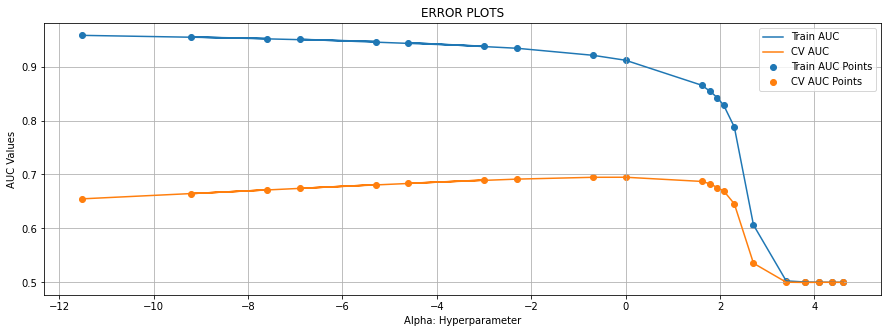

In [ ]:
from sklearn.naive_bayes import MultinomialNB                                   #Loading the requisite libraries
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

train_auc=[]                                                                    #Initilizing lists and the assuming a set of Alpha values
cv_auc=[]
alp= [0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,6,7,8,10,15,30,45,60,80,100]

for i in tqdm(alp):                                                             #Looping through each value of aplha to get a different set of Y_pred for each value of Alpha
  naib= MultinomialNB(alpha= i, class_prior= np.array([0.5,0.5]))               #Calling the model and storing in a variable

  naib.fit(x_tr_b,y_train)                                                      #Fitting the model and the predicting the Y values on train and cv datasets

  y_pred_train= batch_predict(naib,x_tr_b)
  y_pred_cv= batch_predict(naib,x_cv_b)

  train_auc.append(roc_auc_score(y_train, y_pred_train))
  cv_auc.append(roc_auc_score(y_cv, y_pred_cv))

#Converting the Alpha values to Log scale for ease of readability
l_alp=[]
for j in alp:
  l_alp.append(np.log(j))

#Plotting the AUC values for Train and CV datasets against the Alpha values
plt.figure(figsize=(15,5))
plt.plot(l_alp, train_auc, label="Train AUC")
plt.plot(l_alp, cv_auc, label= "CV AUC")

plt.scatter(l_alp, train_auc, label="Train AUC Points")
plt.scatter(l_alp, cv_auc, label="CV AUC Points")

plt.legend()

plt.title('ERROR PLOTS')
plt.xlabel("Alpha: Hyperparameter")
plt.ylabel("AUC Values")
plt.grid()
plt.show()


###Observation: We see that AUC value for CV dataset is the highest at ~0.7 for Alpha values of 0. Alpha values here are in Log scale

In [ ]:
#Converting the Log(alpha) values
best_alpha= np.exp(0)
print("Best Alpha Value:", best_alpha)

Best Alpha Value: 1.0


###Plotting the ROC curve for the best aplha value which herein is 1 for both the Train and Test datasets

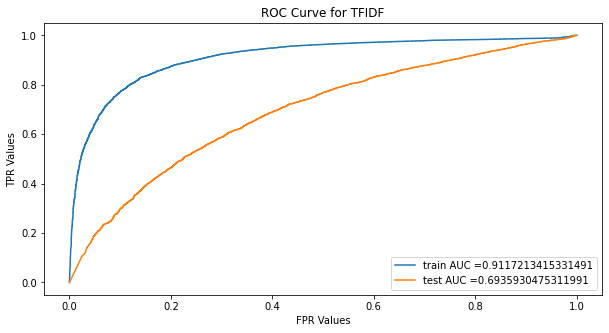

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

naib= MultinomialNB(alpha= 1,class_prior=np.array([0.5,0.5]))

naib.fit(x_tr_b,y_train)

y_train_pred= batch_predict(naib,x_tr_b)
y_test_pred= batch_predict(naib, x_te_b)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)


plt.figure(figsize= (10,5))
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR Values")
plt.ylabel('TPR Values')
plt.title('ROC Curve for TFIDF')
plt.show()


###Obseravation: Here from the above graph we see that the AUC for train dataset is 0.91 and for the Test dataset is 0.69. The Model seem to have performed fairly well, although there could be some indication of overfitting as we need the Train and Test AUC values to come as close as possible. 

##Confusion Matrix for both Train and Test Data at Threshold of 0.5

####Confusion Matrix on Training Dataset

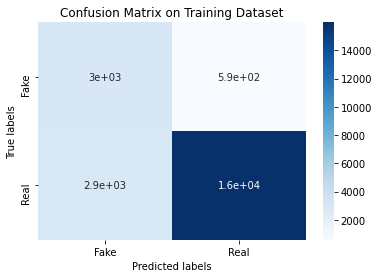

In [ ]:
#Reference for the code: https://stackoverflow.com/questions/61748441/how-to-fix-the-values-displayed-in-a-confusion-matrix-in-exponential-form-to-nor

for i in range(len(y_train_pred)):
  if y_train_pred[i]>=0.5:
    y_train_pred[i]=1
  else:
    y_train_pred[i]=0

cp_tr= confusion_matrix(y_train,y_train_pred)
ax= plt.subplot();
sns.heatmap(cp_tr, annot=True,cmap='Blues',ax=ax);
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_ylim(2.0, 0)
ax.set_title('Confusion Matrix on Training Dataset');
ax.xaxis.set_ticklabels(['Fake','Real']); 
ax.yaxis.set_ticklabels(['Fake','Real']);

####Confusion Matrix on Test Dataset

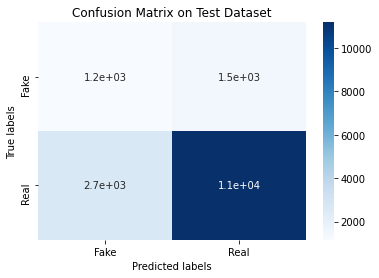

In [ ]:
#Reference for the code: https://stackoverflow.com/questions/61748441/how-to-fix-the-values-displayed-in-a-confusion-matrix-in-exponential-form-to-nor
for j in range(len(y_test_pred)):
  if y_test_pred[j]>=0.5:
    y_test_pred[j]=1
  else:
    y_test_pred[j]=0

cp_te= confusion_matrix(y_test,y_test_pred)
ax= plt.subplot();
sns.heatmap(cp_te, annot=True,cmap='Blues',ax=ax);
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_ylim(2.0, 0)
ax.set_title('Confusion Matrix on Test Dataset');
ax.xaxis.set_ticklabels(['Fake','Real']); 
ax.yaxis.set_ticklabels(['Fake','Real']);

##Applyting the NaiveBayes Classifier on TFIDF vectorized set of text data

100%|██████████| 21/21 [00:02<00:00,  9.37it/s]


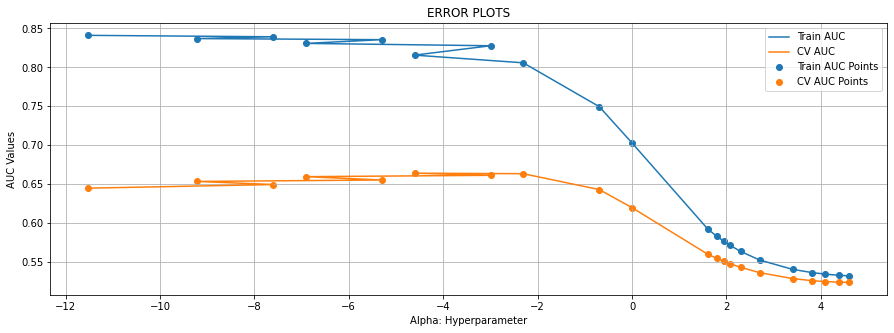

In [ ]:
train_auc_tf=[]
cv_auc_tf=[]
alp= [0.00001,0.0001, 0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,5,6,7,8,10,15,30,45,60,80,100]
alp.sort()
for i in tqdm(alp):
  naib= MultinomialNB(alpha= i, class_prior= np.array([0.5,0.5]))

  naib.fit(x_tr_tf,y_train)

  y_pred_train_tf= batch_predict(naib,x_tr_tf)
  y_pred_cv_tf= batch_predict(naib,x_cv_tf)

  train_auc_tf.append(roc_auc_score(y_train, y_pred_train_tf))
  cv_auc_tf.append(roc_auc_score(y_cv, y_pred_cv_tf))

l_alp_tf=[]
for j in alp:
  l_alp_tf.append(np.log(j))

plt.figure(figsize=(15,5))
plt.plot(l_alp, train_auc_tf, label="Train AUC")
plt.plot(l_alp, cv_auc_tf, label= "CV AUC")

plt.scatter(l_alp, train_auc_tf, label="Train AUC Points")
plt.scatter(l_alp, cv_auc_tf, label="CV AUC Points")

plt.legend()

plt.title('ERROR PLOTS')
plt.xlabel("Alpha: Hyperparameter")
plt.ylabel("AUC Values")
plt.grid()
plt.show()

Observation: We see that AUC value for CV dataset is the highest at ~0.67 for Alpha values of -3. Alpha values here are in Log scale

In [ ]:
#Converting the Log(alpha) values
np.exp(-3)

0.049787068367863944

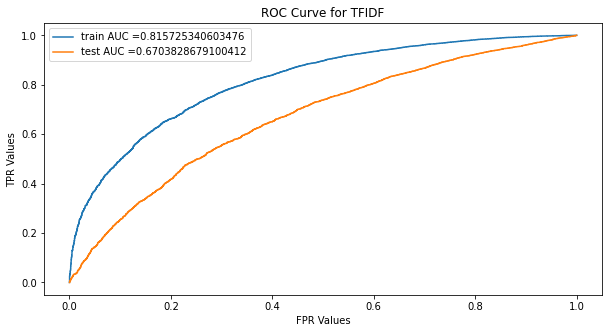

In [ ]:
import matplotlib.pyplot as plt

naib= MultinomialNB(alpha= 0.05,class_prior=np.array([0.5,0.5]))

naib.fit(x_tr_tf,y_train)

y_train_pred_tf= batch_predict(naib,x_tr_tf)
y_test_pred_tf= batch_predict(naib, x_te_tf)

train_fpr_tf, train_tpr_tf, tr_thresholds_tf = roc_curve(y_train, y_train_pred_tf)
test_fpr_tf, test_tpr_tf, te_thresholds_tf = roc_curve(y_test, y_test_pred_tf)

plt.figure(figsize= (10,5))
plt.plot(train_fpr_tf, train_tpr_tf, label="train AUC ="+str(auc(train_fpr_tf, train_tpr_tf)))
plt.plot(test_fpr_tf, test_tpr_tf, label="test AUC ="+str(auc(test_fpr_tf, test_tpr_tf)))
plt.legend()
plt.xlabel("FPR Values")
plt.ylabel('TPR Values')
plt.title('ROC Curve for TFIDF')
plt.show()

Obseravation: Here from the above graph we see that the AUC for train dataset is 0.91 and for the Test dataset is 0.67. The Model seem to have performed better than the BOW factorization. Although the AUC here is fractionally lower that we got under BOW factorization as the Train and Test AUC values are closer than they were in the case of BOW.

##Confusion Matrix for both Train and Test Data at Threshold of 0.5

#####Confusion Matrix on Train Dataset

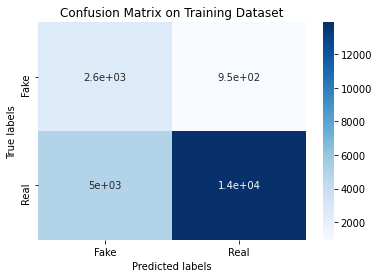

In [ ]:
#Reference for the code: https://stackoverflow.com/questions/61748441/how-to-fix-the-values-displayed-in-a-confusion-matrix-in-exponential-form-to-nor
for i in range(len(y_train_pred_tf)):
  if y_train_pred_tf[i]>=0.5:
    y_train_pred_tf[i]=1
  else:
    y_train_pred_tf[i]=0

cp_tr_tf= confusion_matrix(y_train,y_train_pred_tf)
ax= plt.subplot();
sns.heatmap(cp_tr_tf, annot=True,cmap='Blues',ax=ax);
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_ylim(2.0, 0)
ax.set_title('Confusion Matrix on Training Dataset');
ax.xaxis.set_ticklabels(['Fake','Real']); 
ax.yaxis.set_ticklabels(['Fake','Real']);

#####Confusion Matrix on Test Dataset

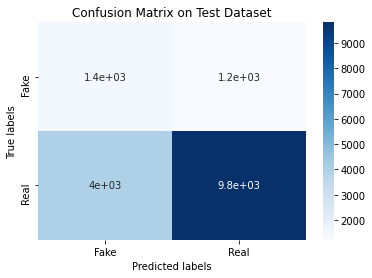

In [ ]:
#Reference for the code: https://stackoverflow.com/questions/61748441/how-to-fix-the-values-displayed-in-a-confusion-matrix-in-exponential-form-to-nor
for j in range(len(y_test_pred_tf)):
  if y_test_pred_tf[j]>=0.5:
    y_test_pred_tf[j]=1
  else:
    y_test_pred_tf[j]=0

cp_te_tf= confusion_matrix(y_test,y_test_pred_tf)
ax= plt.subplot();
sns.heatmap(cp_te_tf, annot=True,cmap='Blues',ax=ax);
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_ylim(2.0, 0)
ax.set_title('Confusion Matrix on Test Dataset');
ax.xaxis.set_ticklabels(['Fake','Real']); 
ax.yaxis.set_ticklabels(['Fake','Real']);

##Getting the Top 20 Positive and Negative Values

In [ ]:
#Getting the Log Probablities of all the features
naib.fit(x_tr_tf,y_train).feature_log_prob_

array([[-10.85512498,  -9.7672013 ,  -8.9366489 , ..., -10.93927279,
         -2.80074978,  -3.24737682],
       [-10.87676939,  -9.83355453,  -8.77983015, ..., -12.60418253,
         -2.80870185,  -3.17458807]])

In [ ]:
#Sorting the Postive and Negative features basis log probablities
fea= np.argsort(naib.fit(x_tr_tf,y_train).feature_log_prob_)
#Storing the top 20 postive features with highest proababilities
pos_fea= np.flip(fea[0])[:20]
#Storing the top 20 negative features with highest proababilities
neg_fea= np.flip(fea[1])[:20]

In [ ]:
#References for the below code:
#https://www.kaggle.com/nikhilparmar9/naive-bayes-donorschoose-dataset
#https://github.com/sujitjean/Naive-Bayes-Algorithm-for-Classification-of-DonorsChoose

l=[]
for i in vect_b.get_feature_names():
  l.append(i)

for i in vect_ohe.get_feature_names():
  l.append(i)

print("The Top 20 Features in the Positive Class are:",np.take(l,pos_fea))
print("="*150)
print("The Top 20 Features in the Negative Class are:",np.take(l,neg_fea)) 

The Top 20 Features in the Positive Class are: ['county my' 'county our' 'could one' 'could use' 'could really use'
 'could used' 'could play' 'could provide' 'countries'
 'countries around world' 'countries around' 'could take' 'could read'
 'corner room' 'college future' 'countless' 'country they' 'could year'
 'could see' 'counseling']
The Top 20 Features in the Negative Class are: ['county my' 'county our' 'could one' 'could use' 'could really use'
 'could used' 'could play' 'could provide' 'countries'
 'countries around world' 'countries around' 'could take' 'could read'
 'corner room' 'countless' 'college future' 'could year' 'country they'
 'could see' 'could not wait']



<h1>3. Summary</h1>

<br> as mentioned in the step 5 of instructions

In [ ]:
from prettytable import PrettyTable
sumtable= PrettyTable(['Vectorizer','Model','Alpha (hyperparameter)','Train AUC','Test AUC'])

sumtable.add_row(['Bag of Words', 'Multinomial NB', '1', '0.914','0.690'])
sumtable.add_row(['TFIDF', 'Multinomial NB', '0.05', '0.818','0.675'])

print(sumtable)

+--------------+----------------+------------------------+-----------+----------+
|  Vectorizer  |     Model      | Alpha (hyperparameter) | Train AUC | Test AUC |
+--------------+----------------+------------------------+-----------+----------+
| Bag of Words | Multinomial NB |           1            |   0.914   |  0.690   |
|    TFIDF     | Multinomial NB |          0.05          |   0.818   |  0.675   |
+--------------+----------------+------------------------+-----------+----------+
